# Data Processing

## First steps:
1. Download dataset from https://www.kaggle.com/datasets/awsaf49/brats2020-training-data/
2. extract data set to /Data/
3. 

In [12]:
import nibabel as nib
import numpy as np
import os
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import pandas as pd
from torchvision.io import read_image
from sklearn.model_selection import train_test_split

In [5]:
print(os.getcwd())

c:\Users\01150138\Desktop\informatyka mgr\GSN\Projekt\BrainCancerSegmentation\src\data


BraTS20_Training_129_flair.nii
(240, 240, 155)


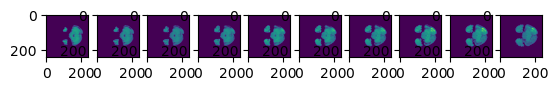

In [114]:
path = '../../Brats/BraTS2020_TrainingData\BraTS20_Training_129'

filename = os.listdir(path)[0]
print(filename)
img = np.array(nib.load(path+'/'+filename).dataobj)
print(img.shape)
f = plt.figure()
ii = 0
for i in range(30,40):
    f.add_subplot(1, 10, ii + 1)
    plt.imshow(img[:,:,i])
    ii+=1



In [101]:
class BratsDataset(Dataset):
    def __init__(self, df_with_paths,batch_size = 8, slices_range = [30,130], num_of_slices = 20):
        self.images = self._process(df_with_paths)
        self.batch_size = batch_size
    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        pass
    def _process(self,df, channel = 0):
        '''
        Take list of paths to folders as input and return dataset of 2D images and labels
        Images are in .nii file format, which we read using "nibabel" and get 3D images,
        then 3D images needs to be cut into 2D slices.
        '''
        for filename in df['BraTS_2020_subject_ID']:
            # read 3D image
            print(os.path.join(filename,os.listdir(filename)[channel]))
            img3d = np.array(nib.load(os.path.join(filename,os.listdir(filename)[channel])).dataobj)
            label3d = np.array(nib.load(os.path.join(filename,os.listdir(filename)[1])).dataobj)
            print(img3d.shape,label3d.shape)
            
            #

            break
        pass

    


In [102]:
test1 = BratsDataset(training_filenames)

../../Brats/BraTS2020_TrainingData/BraTS20_Training_033\BraTS20_Training_033_flair.nii
(240, 240, 155) (240, 240, 155)


In [34]:
def generateDatasetPaths(path_to_data,path_training,path_validation):
    '''
    Generate lists containing folder names for training, tests and validation.
    In dataset we already have split between training and validation, 
    we will split validation dataset into 2 pieces: validation and testing.
    Afterwards we are going to shuffle them to gain random order
    '''
    path_training = path_to_data +'/'+ path_training
    path_validation = path_to_data +'/'+ path_validation

    train  =  pd.read_csv(path_training + '/name_mapping.csv')
    train = train[['BraTS_2020_subject_ID']]
    train['BraTS_2020_subject_ID'] = train['BraTS_2020_subject_ID'].apply(lambda x: path_training + '/' + x)
    train = train.sample(frac=1).reset_index(drop=True)

    validandtest  =  pd.read_csv(path_validation+'/name_mapping_validation_data.csv')
    validandtest = validandtest[['BraTS_2020_subject_ID']]
    validandtest['BraTS_2020_subject_ID'] = validandtest['BraTS_2020_subject_ID'].apply(lambda x: path_training + '/' + x)

    valid, test = train_test_split(validandtest, test_size=0.5)
    valid.reset_index(drop=True,inplace=True)
    test.reset_index(drop=True,inplace=True)

    print(f'Dataset split into datasets of size: \nTrain: {len(train)},\nTest: {len(test)},\nValid: {len(valid)}.')

    return train,test,valid

training_filenames,test_filenames,valid_filenames = generateDatasetPaths('../../Brats','BraTS2020_TrainingData','BraTS2020_ValidationData')

Dataset split into datasets of size: 
Train: 369,
Test: 63,
Valid: 62.


In [43]:
training_filenames['images'] = training_filenames['BraTS_2020_subject_ID'].copy()
training_filenames['images'] = training_filenames['images'].apply(lambda x: np.array(nib.load(x+'/'+os.listdir(x)[0]).dataobj))

In [50]:
training_filenames.iloc[0]

BraTS_2020_subject_ID    ../../Brats/BraTS2020_TrainingData/BraTS20_Tra...
images                   [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
Name: 0, dtype: object